In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm
from sklearn import preprocessing
from scipy import stats
from itertools import combinations

from news_vec.utils import read_json_gz_lines

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [3]:
df = pd.DataFrame(list(tqdm(read_json_gz_lines('../../data/clf-ab-ts-acc.json/'))))

1092000it [00:02, 386425.13it/s]


In [6]:
d1s, d2s = zip(*df[['d1', 'd2']].apply(lambda x: sorted(x), 1))
df.drop(['d1', 'd2'], 1)
df['d1'] = d1s
df['d2'] = d2s

In [14]:
pairs = set(map(tuple, df[['d1', 'd2']].values.tolist()))

In [4]:
def plot_pair(d1, d2):
    pdf = df[(df.d1==d1)&(df.d2==d2)].sort_values('window')
    plt.figure(figsize=(8,3))
    sns.boxplot(x='window', y='acc', data=pdf)
    plt.show()

In [18]:
rows = []
for d1, d2 in tqdm(pairs):
    pdf = df[(df.d1==d1)&(df.d2==d2)].sort_values('window')
    lr = stats.linregress(pdf.window, pdf.acc)
    rows.append((d1, d2, lr.slope, lr.pvalue, lr.rvalue))

100%|██████████| 120/120 [00:26<00:00,  4.46it/s]


In [19]:
lrdf = pd.DataFrame(rows, columns=('d1', 'd2', 'slope', 'p', 'r'))

buzzfeed.com huffingtonpost.com


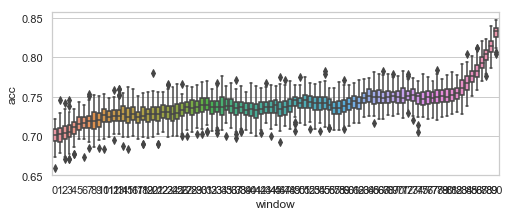

foxnews.com rt.com


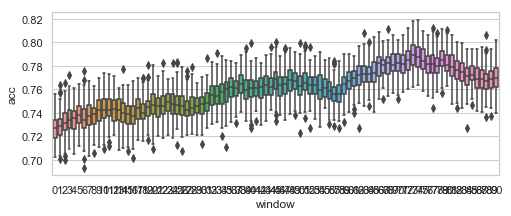

buzzfeed.com foxnews.com


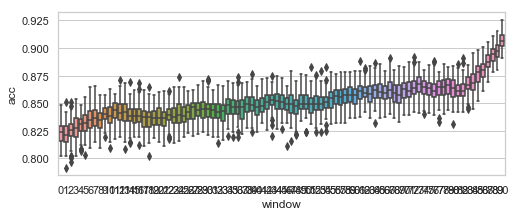

foxnews.com wsj.com


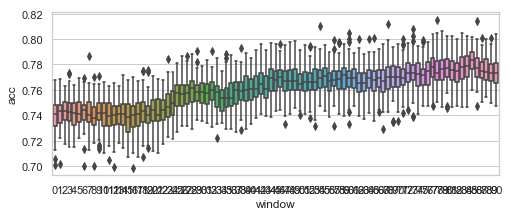

apnews.com foxnews.com


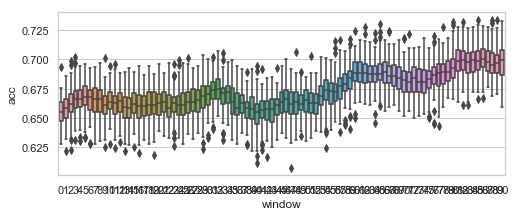

breitbart.com buzzfeed.com


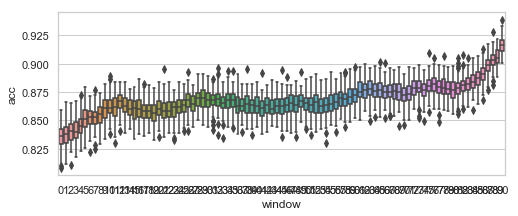

cnn.com foxnews.com


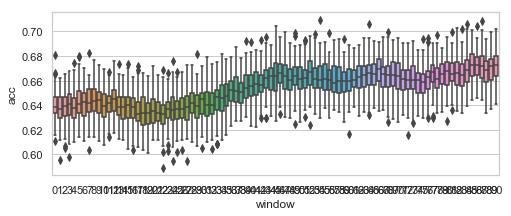

foxnews.com washingtonpost.com


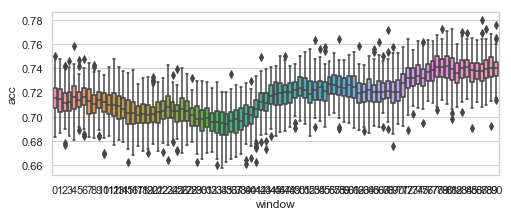

apnews.com buzzfeed.com


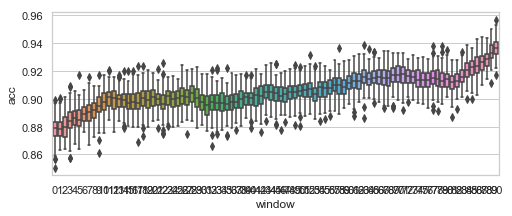

dailycaller.com rt.com


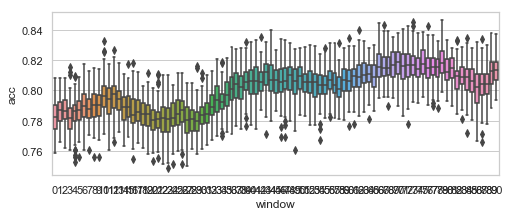

In [29]:
for r in lrdf.sort_values('slope', ascending=False).head(10).itertuples():
    print(r.d1, r.d2)
    plot_pair(r.d1, r.d2)

huffingtonpost.com thehill.com


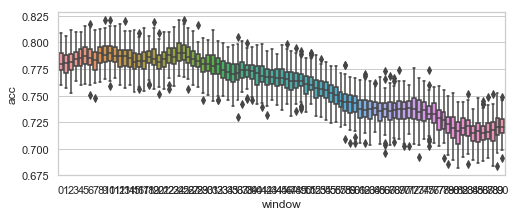

dailykos.com huffingtonpost.com


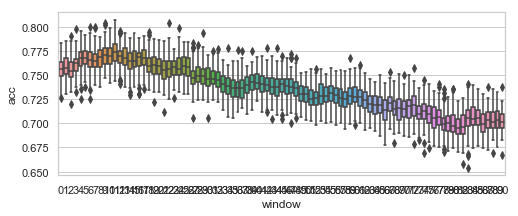

rt.com sputniknews.com


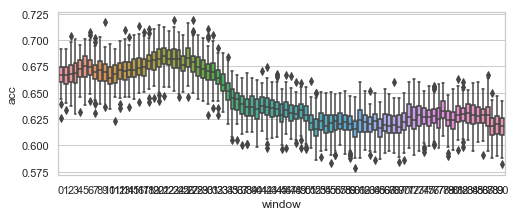

cnn.com huffingtonpost.com


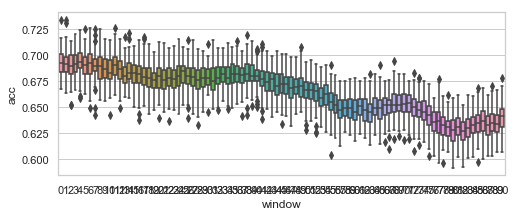

cnn.com dailykos.com


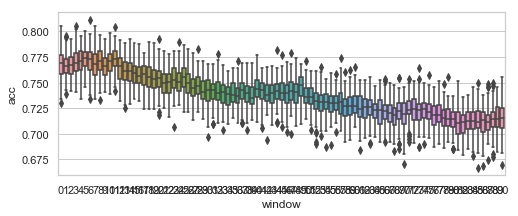

dailykos.com thehill.com


In [ ]:
for r in lrdf.sort_values('slope', ascending=True).head(10).itertuples():
    print(r.d1, r.d2)
    plot_pair(r.d1, r.d2)